# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.stats import kurtosis
from scipy.stats import skew

# IMPORT DATA SET

In [3]:
df=pd.read_csv('Salary_Data.csv')

In [36]:
df.head()

,YearsExperience,Salary,log_Salary,log_YearsExperience
0,1.1,39343.0,10.580073,0.095310
1,1.3,46205.0,10.740843,0.262364
2,1.5,37731.0,10.538237,0.405465
3,2.0,43525.0,10.681091,0.693147
4,2.2,39891.0,10.593906,0.788457


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# EDA

C:\Users\sanjana\anaconda3\SANJANA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

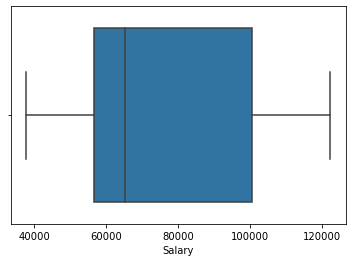

In [7]:
sns.boxplot(df['Salary'])

C:\Users\sanjana\anaconda3\SANJANA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience'>

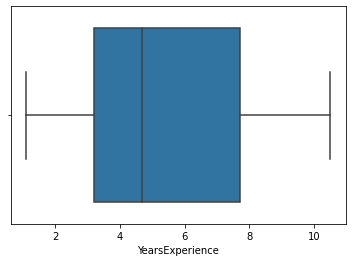

In [8]:
sns.boxplot(df['YearsExperience'])

There are no outliers in both the variables and we can say that the median line is towards the upper portion of the box so
we can say that data is positively skewed.

C:\Users\sanjana\anaconda3\SANJANA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

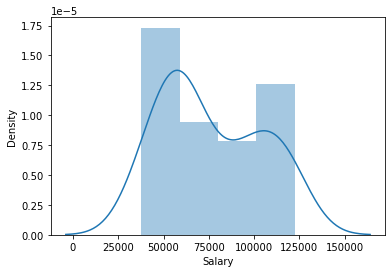

In [9]:
sns.distplot(df['Salary'])

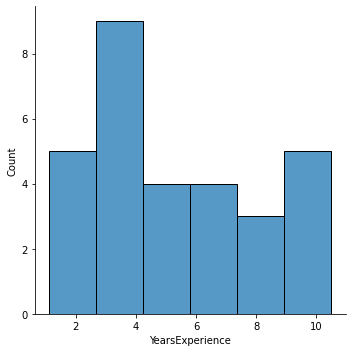

In [10]:
sns.displot(df['YearsExperience'])

The dist.plot says that both the plots are positively skewed

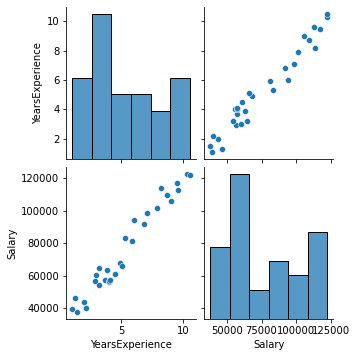

In [11]:
sns.pairplot(df)

There is a positive correlation between Salary and Years of experience. As the years of experience increasesthe salary will
increase.

<AxesSubplot:>

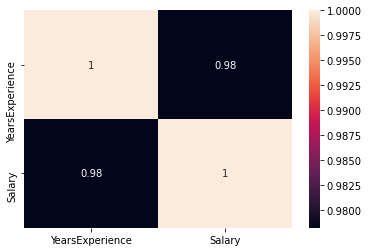

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


The value is 0.978 which is high, so we can say Salary and Experience are having high positive correlation

In [14]:
#The kurtosis of this dataset is less than 0("Light tailed dataset"The much of the data is in each tail then in its peak)
#The use of logarithimic or quadratic transformation would give more accuracy
print(kurtosis(df.Salary))
print(kurtosis(df.YearsExperience))

-1.2829125042427751
-1.0447521989892943


In [15]:
print(skew(df.Salary))
print(skew(df.YearsExperience))

0.3361618825592921
0.3603123252525561


<AxesSubplot:>

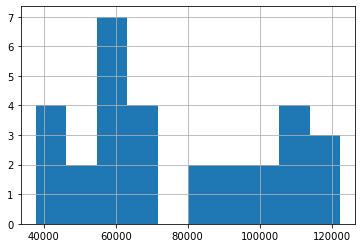

In [16]:
df['Salary'].hist()

<AxesSubplot:>

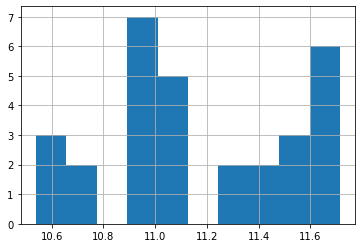

In [17]:
df['log_Salary']=np.log(df['Salary'])
df['log_Salary'].hist()

# Fitting a Linear Regression Model without logarithmic Transformation

In [18]:
import statsmodels.formula.api as smf
model = smf.ols('Salary~YearsExperience',df).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

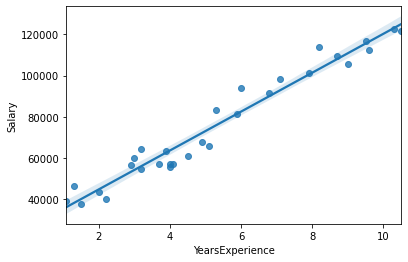

In [19]:
sns.regplot(x="YearsExperience", y="Salary",data=df)

In [20]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [21]:
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [22]:
(model.rsquared,model.rsquared_adj)


(0.9569566641435086, 0.9554194021486339)

In [ ]:
#As the Rsquare value is too high and pur model will be overfitted we shld use logarithimic transformation

In [23]:
newdata = pd.Series([8,9,10])

In [24]:
exp_newdata = pd.DataFrame(newdata,columns=['YearsExperience'])

In [25]:
exp_newdata

,YearsExperience
0,8
1,9
2,10


In [26]:
model.predict(exp_newdata)

0    101391.898770
1    110841.861092
2    120291.823413
dtype: float64

# Fitting a Linear Regression Model with logarithmic Transformation

In [27]:
df['log_YearsExperience']=np.log(df['YearsExperience'])

In [28]:
import statsmodels.formula.api as smf
model_log= smf.ols("log_Salary~log_YearsExperience",data = df).fit()

<AxesSubplot:xlabel='log_Salary', ylabel='log_YearsExperience'>

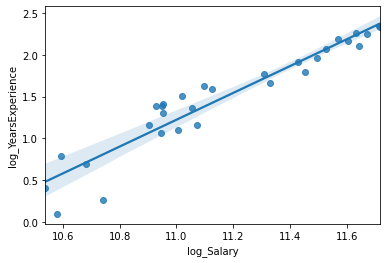

In [29]:
sns.regplot(x="log_Salary", y="log_YearsExperience", data=df)

In [30]:
#Coefficents
model_log.params

Intercept              10.328043
log_YearsExperience     0.562089
dtype: float64

In [31]:
#t values and p values
print(model_log.tvalues, '\n', model_log.pvalues)

Intercept              184.867959
log_YearsExperience     16.352542
dtype: float64 
 Intercept              9.073132e-45
log_YearsExperience    7.395278e-16
dtype: float64


In [32]:
#R squared values
(model_log.rsquared,model_log.rsquared_adj)

(0.9052150725817149, 0.9018298966024904)

In [33]:
newdata_1= pd.Series([8,9,10])

In [34]:
exp_newdata_1= pd.DataFrame(newdata,columns=['log_YearsExperience'])

In [35]:
model_log.predict(exp_newdata_1)

0    14.824754
1    15.386843
2    15.948932
dtype: float64